# Analysis of Finance Dataset

In [43]:
from datasets import load_dataset

ds = load_dataset("gretelai/synthetic_pii_finance_multilingual")

In [57]:
import pandas as pd

df = pd.DataFrame(ds["train"])

df.head()

,level_0,index,document_type,document_description,expanded_type,expanded_description,language,language_description,domain,generated_text,pii_spans,conformance_score,quality_score,toxicity_score,bias_score,groundedness_score
0,40012,40012,Supply Chain Management Agreement,A legal contract outlining the terms and condi...,Vendor Management Contract,This subtype involves the contractual agreemen...,English,English language as spoken in the United State...,finance,SUPPLY CHAIN MANAGEMENT AGREEMENT\n\nThis Supp...,"[{""start"": 119, ""end"": 141, ""label"": ""date""}, ...",85,90,5,15,95
1,46425,46425,Supply Chain Management Agreement,A legal contract outlining the terms and condi...,Supply Chain Resilience Framework,This subtype details the framework for buildin...,English,English language as spoken in the United State...,finance,SUPPLY CHAIN RESILIENCE FRAMEWORK\n\nThis Supp...,"[{""start"": 119, ""end"": 142, ""label"": ""date""}, ...",92,87,5,12,95
2,4689,4689,Real Estate Loan Agreement,A legal contract outlining terms and condition...,International Real Estate Investment Loan Agre...,This subtype encompasses loans for internation...,Spanish,Spanish language as spoken in Spain or Mexico,finance,CONTRATO DE PRÉSTAMO PARA INVERSIÓN INMOBILIAR...,"[{""start"": 182, ""end"": 209, ""label"": ""street_a...",85,90,5,15,95
3,3002,3002,Real Estate Loan Agreement,A legal contract outlining terms and condition...,Commercial Property Loan Contract,This subtype focuses on loans for commercial r...,Italian,Italian language as spoken in Italy,finance,REPUBBLICA ITALIANA\n\nCONTRATTO DI PRESTITO I...,"[{""start"": 85, ""end"": 103, ""label"": ""name""}, {...",85,90,5,10,95
4,16187,16187,Email,A communication sent electronically containing...,Invitation,Create an email inviting recipients to an even...,France,French language as spoken in France,finance,Subject: Invitation à notre soirée de lancemen...,"[{""start"": 202, ""end"": 207, ""label"": ""time""}, ...",85,90,5,15,95


In [58]:
# Show data types of each column
df.dtypes

level_0                  int64
index                    int64
document_type           object
document_description    object
expanded_type           object
expanded_description    object
language                object
language_description    object
domain                  object
generated_text          object
pii_spans               object
conformance_score        int64
quality_score            int64
toxicity_score           int64
bias_score               int64
groundedness_score       int64
dtype: object

In [45]:
# Get the shape of the DataFrame: (rows, columns)
num_rows, num_columns = df.shape

# Print the result
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Show all column names
print("Column names:", df.columns.tolist())


Number of rows: 50346
Number of columns: 16
Column names: ['level_0', 'index', 'document_type', 'document_description', 'expanded_type', 'expanded_description', 'language', 'language_description', 'domain', 'generated_text', 'pii_spans', 'conformance_score', 'quality_score', 'toxicity_score', 'bias_score', 'groundedness_score']


🔑 Column-by-column breakdown:

Column	                        Meaning

level_0, index:	                Internal row index — not important
document_type:  	            General type (e.g., "Real Estate Loan Agreement")
document_description:	        Short description of the document
expanded_type:	                More specific subtype (e.g., "Vendor Management Contract")
expanded_description:	        Description of the subtype
language, language_description:	Language code and description (e.g., "English")
domain:                     	Always "finance" in this dataset
generated_text:             	Full text content of the synthetic document
pii_spans:                  	Detected sensitive data positions and types (e.g., name, date)
conformance_score:          	Structural realism (higher = more like real documents)
quality_score:              	Text fluency, grammar, coherence (higher = better)
toxicity_score:             	Lower = less offensive or harmful language
bias_score:                 	Lower = less social/political bias
groundedness_score:         	Higher = more factual/logically grounded content

In [46]:
# Display the first row with all its fields
# This helps us understand the structure of one full data point
print(df.iloc[0])

level_0                                                             40012
index                                                               40012
document_type                           Supply Chain Management Agreement
document_description    A legal contract outlining the terms and condi...
expanded_type                                  Vendor Management Contract
expanded_description    This subtype involves the contractual agreemen...
language                                                          English
language_description    English language as spoken in the United State...
domain                                                            finance
generated_text          SUPPLY CHAIN MANAGEMENT AGREEMENT\n\nThis Supp...
pii_spans               [{"start": 119, "end": 141, "label": "date"}, ...
conformance_score                                                      85
quality_score                                                          90
toxicity_score                        

In [53]:
#Printing the generated_text field
print("Generated Text:", df["generated_text"].iloc[0])

Generated Text: SUPPLY CHAIN MANAGEMENT AGREEMENT

This Supply Chain Management Agreement (the "Agreement") is entered into as of this 1st day of March, 2021 (the "Effective Date"), by and between Cameron-Mcknight, a company organized and existing under the laws of the state of Delaware, with its head office located at 81685 Lopez Lodge, Apt. 6502, hereinafter referred to as "Cameron-Mcknight", and Jann N. Butte, an individual with a mailing address of 81685 Lopez Lodge, Apt. 6502.

WHEREAS, Cameron-Mcknight desires to engage the services of Vendor for the provision of goods and services in connection with Cameron-Mcknight's supply chain operations; and

WHEREAS, Vendor desires to provide such goods and services to Cameron-Mcknight on the terms and conditions set forth herein.

NOW, THEREFORE, in consideration of the mutual covenants and promises contained herein, the parties hereto agree as follows:

1. APPOINTMENT

Cameron-Mcknight hereby appoints Vendor as a vendor for the provision

In [47]:
# Column names
print("📌 Columns:", df.columns.tolist())

# First row (metadata and structure)
print("\n📄 First row:")
print(df.iloc[0])

# Top 10 expanded types
print("\n📊 Most common expanded types:")
print(df["expanded_type"].value_counts().head(10))

# Language distribution
print("\n🌍 Language distribution:")
print(df["language"].value_counts())

# Show text and PII spans of first row
print("\n📝 Text:\n", df["generated_text"][0])
print("\n🔒 PII Spans:\n", df["pii_spans"][0])

📌 Columns: ['level_0', 'index', 'document_type', 'document_description', 'expanded_type', 'expanded_description', 'language', 'language_description', 'domain', 'generated_text', 'pii_spans', 'conformance_score', 'quality_score', 'toxicity_score', 'bias_score', 'groundedness_score']

📄 First row:
level_0                                                             40012
index                                                               40012
document_type                           Supply Chain Management Agreement
document_description    A legal contract outlining the terms and condi...
expanded_type                                  Vendor Management Contract
expanded_description    This subtype involves the contractual agreemen...
language                                                          English
language_description    English language as spoken in the United State...
domain                                                            finance
generated_text          SUPPLY CHAIN 

### Filter by language

In [ ]:
# Filter DataFrame to only English rows
df_en = df[df["language"] == "English"]

# Show document types in English documents
print(df_en["document_type"].value_counts())

# Check how many English rows
print(f"English rows: {len(df_en)}")


English rows: 25948
document_type
FIX Protocol                              863
MT940                                     825
SWIFT Message                             824
CSV                                       818
IT support ticket                         798
FpML                                      796
EDI                                       794
ISDA Definition                           792
Bill of Lading                            784
Safety Data Sheet                         772
XBRL                                      765
Customer support conversational log       760
Loan Application                          759
Insurance Policy                          751
Email                                     747
BAI Format                                738
Policyholder's Report                     723
Financial Statement                       719
Investment Prospectus                     525
Payment Confirmation                      510
Trade Confirmation                        509


### 📘 Document Type Descriptions

Below are brief descriptions of all 60 document types used in the dataset. These are helpful for understanding the target labels in your classification model:

- **FIX Protocol**: Financial messaging standard for electronic trading.
- **MT940**: SWIFT message for bank account statements.
- **SWIFT Message**: International financial transaction message format.
- **CSV**: Comma-separated values file for tabular data exchange.
- **IT support ticket**: Request for technical assistance or issue resolution.
- **FpML**: Financial products markup language for derivatives data.
- **EDI**: Electronic data interchange format for business documents.
- **ISDA Definition**: Standard legal definitions for derivatives contracts.
- **Bill of Lading**: Shipping document for cargo transport and receipt.
- **Safety Data Sheet**: Information on chemical safety and handling.
- **XBRL**: XML-based language for financial reporting.
- **Customer support conversational log**: Record of customer service chat interactions.
- **Loan Application**: Form requesting approval for a loan.
- **Insurance Policy**: Contract outlining terms of insurance coverage.
- **Email**: Electronic communication message.
- **BAI Format**: Bank Administration Institute format for cash reports.
- **Policyholder's Report**: Summary of policy activity and performance.
- **Financial Statement**: Formal record of financial activities.
- **Investment Prospectus**: Document outlining investment offer details.
- **Payment Confirmation**: Proof that a payment has been processed.
- **Trade Confirmation**: Record verifying a completed trade.
- **Health Insurance Claim Form**: Request for reimbursement of medical costs.
- **Corporate Tax Return**: Company’s annual tax filing document.
- **Mortgage Amortization Schedule**: Loan repayment breakdown over time.
- **Pension Plan Agreement**: Contract defining employee retirement benefits.
- **Regulatory Filing**: Submission of required financial/regulatory documents.
- **Tax Return**: Filed document reporting income and tax obligations.
- **Credit Card Application**: Request form for a credit card.
- **Loan Agreement**: Contract specifying terms of a loan.
- **Insurance Claim Form**: Request for insurance compensation.
- **Financial Risk Assessment**: Evaluation of financial risks and exposures.
- **Credit Application**: Form used to apply for credit or a loan.
- **Shareholder Agreement**: Contract among shareholders on company governance.
- **Corporate Governance Guidelines**: Policies for corporate oversight and ethics.
- **Financial Disclosure Statement**: Declaration of financial position and interests.
- **Dispute Resolution Policy**: Procedures for resolving business conflicts.
- **Transaction Confirmation**: Acknowledgment of a completed financial transaction.
- **Tax Assessment Notice**: Official notice of tax due from authorities.
- **Supply Chain Management Agreement**: Contract with suppliers outlining terms and logistics.
- **Annual Report**: Yearly summary of company financials and performance.
- **Financial Data Feed**: Real-time or batch delivery of financial data.
- **Business Plan**: Document describing business strategy and goals.
- **Customer Agreement**: Terms and conditions agreed with a customer.
- **Bank Statement**: Summary of account activity over a period.
- **Audit Report**: Independent evaluation of financial records.
- **Currency Exchange Rate Sheet**: Table showing current currency conversion rates.
- **Mortgage Contract**: Agreement defining mortgage loan terms.
- **Product Disclosure Statement**: Explanation of financial product risks and features.
- **Privacy Policy**: Statement on data handling and user privacy.
- **Real Estate Loan Agreement**: Loan terms for financing property purchases.
- **Financial Regulatory Compliance Report**: Document verifying adherence to financial regulations.
- **Regulatory Compliance Guide**: Instructions for following regulatory requirements.
- **Renewal Reminder**: Notification of an upcoming contract renewal.
- **Cryptocurrency Transaction Report**: Record of digital asset transactions.
- **Financial Aid Application**: Form requesting educational financial assistance.
- **Financial Forecast**: Projection of future financial performance.
- **Compliance Certificate**: Proof of meeting regulatory or legal standards.
- **Employment Contract**: Agreement defining employment terms and responsibilities.
- **Credit Card Statement**: Monthly summary of credit card activity.
- **Securities Prospectus**: Details of securities offered for sale to investors.


### Class distrubution for English Documents

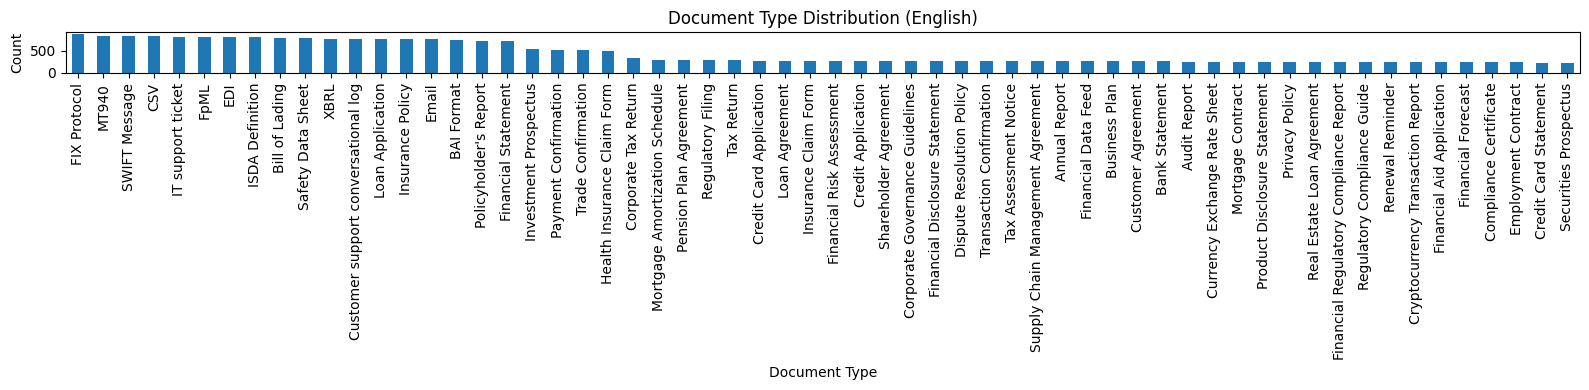

In [60]:
import matplotlib.pyplot as plt

# Plot class distribution for English documents
df_en["document_type"].value_counts().plot(kind="bar", figsize=(16,4), title="Document Type Distribution (English)")
plt.xlabel("Document Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### 📊 Plot: Quality, Bias, Groundedness, Toxicity


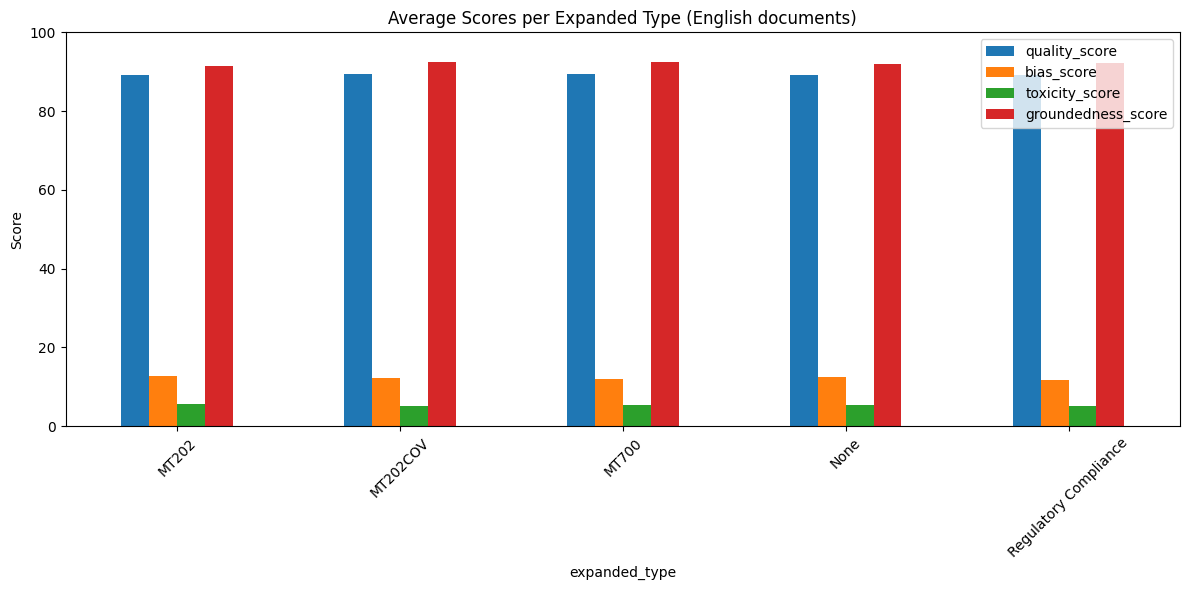

In [49]:
import matplotlib.pyplot as plt

# Focus on top 5 expanded types
top_types = df_en["expanded_type"].value_counts().head(5).index
subset = df_en[df_en["expanded_type"].isin(top_types)]

# Group by type and calculate mean scores
score_means = subset.groupby("expanded_type")[["quality_score", "bias_score", "toxicity_score", "groundedness_score"]].mean()

# Plot
score_means.plot(kind="bar", figsize=(12, 6))
plt.title("Average Scores per Expanded Type (English documents)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


### 📊 Average Scores per Expanded Document Type (English)
Each color bar represents one of the following scores:

🔵 quality_score: All types have ~90 → indicates well-written, coherent text.

🟠 bias_score: ~12–13 → Low values are good (less social or political bias).

🟢 toxicity_score: ~5–6 → Very low → content is clean and non-offensive.

🔴 groundedness_score: ~92–93 → High factual consistency with the type.


### 📌 Interpretation per type:
MT202, MT202COV, MT700 (SWIFT formats) show:

High quality and groundedness

Low toxicity and bias

Regulatory Compliance and None:

Similar score profiles, slightly more variation in bias


### ✅ Overall:
The dataset is clean, neutral, and high-quality, which is great for training:

De-identification models

Document classifiers

LLM pretraining/fine-tuning

In [50]:
# Show value counts for high-level document type
print("🔹 Document Type Distribution:")
print(df["document_type"].value_counts())

# Show top 10 specific subtypes (expanded_type)
print("\n🔹 Expanded Type Distribution:")
print(df["expanded_type"].value_counts().head(10))

# Show language distribution
print("\n🔹 Language Distribution:")
print(df["language"].value_counts())

# Check for any missing values in important columns
print("\n🔹 Missing values:")
print(df[["generated_text", "document_type", "expanded_type"]].isnull().sum())


🔹 Document Type Distribution:
document_type
SWIFT Message                             1597
FIX Protocol                              1594
CSV                                       1560
MT940                                     1554
Safety Data Sheet                         1544
EDI                                       1542
IT support ticket                         1532
FpML                                      1529
Bill of Lading                            1520
Loan Application                          1505
ISDA Definition                           1497
BAI Format                                1488
XBRL                                      1487
Policyholder's Report                     1469
Email                                     1458
Financial Statement                       1457
Insurance Policy                          1455
Customer support conversational log       1447
Payment Confirmation                      1033
Investment Prospectus                     1008
Trade Confirmati

### Why we use `generated_text` and `document_type`

In text classification, we need:

- **Input (X)**: the text we want to classify → here, it's `generated_text`, which contains the full document content.

- **Target (y)**: the label we want to predict → here, it's `document_type`, which tells us the type of document (e.g., Email, Loan Agreement).

We are training the model to read a document and guess what type it is.


In [52]:
#Finding how many labels in document_type
document_type_counts = df["document_type"].value_counts()
print("\n🔹 Document Type Counts:")
print(document_type_counts)
print(f"\nNumber of unique labels: {document_type_counts.shape[0]}")


🔹 Document Type Counts:
document_type
SWIFT Message                             1597
FIX Protocol                              1594
CSV                                       1560
MT940                                     1554
Safety Data Sheet                         1544
EDI                                       1542
IT support ticket                         1532
FpML                                      1529
Bill of Lading                            1520
Loan Application                          1505
ISDA Definition                           1497
BAI Format                                1488
XBRL                                      1487
Policyholder's Report                     1469
Email                                     1458
Financial Statement                       1457
Insurance Policy                          1455
Customer support conversational log       1447
Payment Confirmation                      1033
Investment Prospectus                     1008
Trade Confirmation   

We have a total of 60 labels in document_type.

### Summary

- The dataset contains 60 unique document types.
- Data is high quality with minimal missing values.
- Class distribution is shown above.
- Ready for downstream machine learning tasks.
